In [2]:
import pandas as pd

In [3]:
crime_data = pd.read_csv('uk_street_crimes_data_2020_2023.csv')

In [44]:
population_data = pd.read_csv('mid_2020_lsoa_age_estimates.csv')

/var/folders/hx/466vc2k14r73fv002gsbg1nr0000gn/T/ipykernel_31641/11187039.py:1: DtypeWarning: Columns (23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  population_data = pd.read_csv('mid_2020_lsoa_age_estimates.csv')


In [45]:
# Convert columns with object dtype to float after removing commas
object_columns = population_data.select_dtypes(include=['object']).columns
for col in object_columns:
    if col not in ['LSOA Code', 'LSOA Name']:
        # Remove commas
        population_data[col] = population_data[col].str.replace(',', '').astype(float)

# Handle NaN values by replacing them with -1 (or any other placeholder value)
population_data.fillna(-1, inplace=True)

# Convert float columns to integer
float_columns = population_data.select_dtypes(include=['float']).columns
for col in float_columns:
    population_data[col] = population_data[col].astype(int)


def categorize_age(age):
    if age >= 0 and age <= 2:
        return 'Babies'
    elif age >= 3 and age <= 12:
        return 'Children'
    elif age >= 13 and age <= 19:
        return 'Teenagers'
    elif age >= 20 and age <= 34:
        return 'Young Adults'
    elif age >= 35 and age <= 64:
        return 'Adults'
    elif age >= 65 and age <= 74:
        return 'Seniors'
    elif age >= 75:
        return 'Pensioners'

def categorize_age_columns(df):
    age_categories = {
        "Babies": list(range(0, 3)),
        "Children": list(range(3, 13)),
        "Teenagers": list(range(13, 20)),
        "Young Adults": list(range(20, 30)),
        "Adults": list(range(30, 50)),
        "Seniors": list(range(50, 70)),
        "Pensioners": list(range(70, 90)),
        "90+": ["90+"]
    }
    
    for category, age_range in age_categories.items():
        # Convert age range to string to match column names
        age_columns = [str(age) for age in age_range if str(age) in df.columns]
        df[category] = df[age_columns].sum(axis=1)
    
    # Drop the original age columns
    age_columns_to_drop = [str(i) for i in range(91)] + ["90+"]
    df.drop(columns=age_columns_to_drop, inplace=True, errors='ignore')
    
    return df

# Apply the function to the dataframe
population_data_cat = categorize_age_columns(population_data)


In [46]:
population_data.sample(10)

,LSOA Code,LSOA Name,All Ages,Babies,Children,Teenagers,Young Adults,Adults,Seniors,Pensioners
7820,E01017891,Wycombe 022C,1434,39,215,115,5,343,366,257
30258,E01002228,Harrow 003B,2303,91,309,196,277,703,451,253
2615,E01014547,Bristol 030D,1535,36,74,8,181,393,306,204
18964,E01030681,Runnymede 010A,1721,58,207,110,125,479,409,226
2581,E01014511,Bristol 016D,1442,55,219,139,51,397,271,80
12531,E01023867,Watford 011E,2683,135,445,201,177,995,393,123
6982,E01032017,Wiltshire 051D,1439,21,154,107,9,277,492,282
16014,E01027563,Craven 007C,1477,25,125,79,34,251,508,345
29027,E01001018,Croydon 044A,1607,47,220,94,120,402,475,227
181,E01012142,Redcar and Cleveland 002B,1645,36,217,127,60,376,430,240


In [43]:
data.sample(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Place,Size_of_Force,Geographical_Region,Population_Density
4135773,4e94aca72a8449d1dc0262179d027f3caf4a23e3a4d47a...,2021-06-01,Devon & Cornwall Police,Devon & Cornwall Police,-5.274561,50.225781,On or near Shopping Area,E01018897,Cornwall 051D,Public order,Investigation complete; no suspect identified,0.0,Cornwall,Medium,South West England,Low
4184974,3a2e092f8ec1edf665203a6dec9fd19eeca7614c70a09a...,2021-06-01,West Midlands Police,West Midlands Police,-1.759135,52.381663,On or near Redhouse Close,E01010184,Solihull 028B,Vehicle crime,Investigation complete; no suspect identified,0.0,Solihull,Large,West Midlands,High
8611814,dde2286ac8e5593d7bf169cf461589d8066ad676d34e95...,2023-02-01,South Yorkshire Police,South Yorkshire Police,-1.319078,53.433848,On or near Farnworth Road,E01007735,Rotherham 013B,Violence and sexual offences,Unable to prosecute suspect,0.0,Rotherham,Medium,Yorkshire and the Humber,High
2202682,f461b26e8a6ee20e1107f1e010e2d1f03caafb513afc6f...,2021-09-01,Sussex Police,Sussex Police,-0.185685,51.114823,On or near Parking Area,E01031585,Crawley 004C,Shoplifting,Investigation complete; no suspect identified,0.0,Crawley,Medium,South East England,Medium
17397828,9390be06d9d3e1491327aed2c31245fc97acd638b01fcc...,2023-06-01,West Mercia Police,West Mercia Police,-2.316983,52.106737,On or near Court Road,E01032186,Malvern Hills 009C,Burglary,Investigation complete; no suspect identified,0.0,Malvern Hills,Medium,West Midlands,Medium
7422330,e72e8dbc9e01018cc2e24f67dd441809592158f5d4cf59...,2022-05-01,Metropolitan Police Service,Metropolitan Police Service,-0.129398,51.464773,On or near Bedford Road,E01003090,Lambeth 012D,Shoplifting,Investigation complete; no suspect identified,0.0,Lambeth,Large,London,High
7043578,1e6061251c4355ab91f2921ad1c9e18906745a51776037...,2022-05-01,Northamptonshire Police,Northamptonshire Police,-0.811782,52.243703,On or near Park/Open Space,E01027140,Northampton 011A,Public order,Investigation complete; no suspect identified,0.0,Northampton,Medium,East Midlands,Low
15825029,22747af7e311551b24bdceaffe655703c133e1c60d3bf9...,2022-08-01,Humberside Police,Humberside Police,-0.272806,53.765072,On or near Anson Road,E01012849,Kingston upon Hull 017C,Violence and sexual offences,Unable to prosecute suspect,0.0,Kingston upon Hull,Medium,Yorkshire and the Humber,Medium
3481104,NaN,2021-01-01,Metropolitan Police Service,Metropolitan Police Service,-0.160409,51.384870,On or near Wood Street,E01004185,Sutton 001D,Anti-social behaviour,NaN,0.0,Sutton,Large,London,High
18508237,2a51d4ba109db50ad2f9274d3bb6a04543abf21b7bacd3...,2020-11-01,Sussex Police,Sussex Police,-0.225629,51.099995,On or near Runcorn Close,E01031547,Crawley 010A,Violence and sexual offences,Investigation complete; no suspect identified,0.0,Crawley,Medium,South East England,Medium


In [4]:
data = crime_data.copy()


---

## Categorization of Police Forces by Size

The police forces have been categorized into different sizes based on their perceived size, jurisdiction, and general prominence. Here's a breakdown of the categorization and the rationale behind it:

### Large Forces

- **Forces Included**: Metropolitan Police Service, Greater Manchester Police, West Midlands Police, West Yorkshire Police, Merseyside Police.
  
- **Rationale**: These forces cover major metropolitan areas or regions with a high population density. They are responsible for policing some of the UK's largest cities and urban areas, making them some of the most prominent and busiest police forces in the country.

### Medium Forces

- **Forces Included**: Most of the other regional forces, including but not limited to Avon and Somerset Constabulary, Bedfordshire Police, Cambridgeshire Constabulary, and so on.

- **Rationale**: These forces cover significant urban areas but also have a mix of suburban and rural areas. They have a broad jurisdiction that includes both densely populated cities and less populated rural regions.

### Small Forces

- **Forces Included**: Dyfed-Powys Police, City of London Police.

- **Rationale**: These forces predominantly cover rural areas, smaller towns, or have a specific jurisdiction. For instance, the City of London Police has a specific jurisdiction covering the City of London, distinct from the wider London area covered by the Metropolitan Police Service.

### Specialized Forces

- **Forces Included**: British Transport Police, Police Service of Northern Ireland.

- **Rationale**: These forces have a specific jurisdiction or focus, not necessarily based on geographical area. For example, the British Transport Police is responsible for policing railways and other transport systems, while the Police Service of Northern Ireland has a unique role given Northern Ireland's distinct political and historical context.

---

It's important to note that this categorization is based on general knowledge and the perceived size and jurisdiction of the forces. For a precise categorization, specific data on the number of officers or personnel in each force would be required.

refer to https://www.statista.com/statistics/877540/leading-police-forces-by-officer-numbers-in-the-uk/#:~:text=London's%20Metropolitan%20Police%20is%20by,had%207%2C579%20officers%20in%202022.

In [5]:
by_size_of_force = {
    "Large": [
        "Metropolitan Police Service",
        "Greater Manchester Police",
        "West Midlands Police",
        "West Yorkshire Police",
        "Merseyside Police"
    ],
    "Medium": [
        "Avon and Somerset Constabulary",
        "Bedfordshire Police",
        "Cambridgeshire Constabulary",
        "Cheshire Constabulary",
        "Cleveland Police",
        "Cumbria Constabulary",
        "Derbyshire Constabulary",
        "Devon & Cornwall Police",
        "Dorset Police",
        "Durham Constabulary",
        "Essex Police",
        "Gloucestershire Constabulary",
        "Gwent Police",
        "Hampshire Constabulary",
        "Hertfordshire Constabulary",
        "Humberside Police",
        "Kent Police",
        "Lancashire Constabulary",
        "Leicestershire Police",
        "Lincolnshire Police",
        "Norfolk Constabulary",
        "North Wales Police",
        "North Yorkshire Police",
        "Northamptonshire Police",
        "Northumbria Police",
        "Nottinghamshire Police",
        "South Wales Police",
        "South Yorkshire Police",
        "Staffordshire Police",
        "Suffolk Constabulary",
        "Surrey Police",
        "Sussex Police",
        "Thames Valley Police",
        "Warwickshire Police",
        "West Mercia Police",
        "Wiltshire Police"
    ],
    "Small": [
        "Dyfed-Powys Police",
        "City of London Police"
    ],
    "Specialized": [
        "British Transport Police",
        "Police Service of Northern Ireland"
    ]
}

---

## Categorization of Police Forces by Geographical Regions

The police forces in the UK have been categorized based on the primary geographical regions they cover. This categorization helps in understanding the regional distribution and jurisdiction of each police force. Here's a breakdown of the categorization:

### South West England
- **Forces Included**: Avon and Somerset Constabulary, Devon & Cornwall Police, Dorset Police, Gloucestershire Constabulary, Wiltshire Police.
  
- **Rationale**: These forces cover the southwestern part of England, which includes both coastal and inland areas.

### South East England
- **Forces Included**: Hampshire Constabulary, Kent Police, Surrey Police, Sussex Police, Thames Valley Police.

- **Rationale**: This region encompasses the southeastern part of England, which is densely populated and includes several major cities.

### East of England
- **Forces Included**: Bedfordshire Police, Cambridgeshire Constabulary, Essex Police, Hertfordshire Constabulary, Norfolk Constabulary, Suffolk Constabulary.

- **Rationale**: Covering the eastern part of England, these forces oversee a mix of urban and rural areas.

### London
- **Forces Included**: Metropolitan Police Service, City of London Police.

- **Rationale**: Specifically focused on the capital city, these forces are responsible for policing one of the world's major global cities.

### West Midlands
- **Forces Included**: Staffordshire Police, Warwickshire Police, West Mercia Police, West Midlands Police.

- **Rationale**: This region covers the western-central part of England and includes major cities like Birmingham.

### East Midlands
- **Forces Included**: Derbyshire Constabulary, Leicestershire Police, Lincolnshire Police, Northamptonshire Police, Nottinghamshire Police.

- **Rationale**: Situated in the eastern-central part of England, this region has a mix of urban centers and countryside.

### North West England
- **Forces Included**: Cheshire Constabulary, Cumbria Constabulary, Greater Manchester Police, Lancashire Constabulary, Merseyside Police.

- **Rationale**: Covering the northwestern part of England, this region includes major cities like Manchester and Liverpool.

### North East England
- **Forces Included**: Cleveland Police, Durham Constabulary, Northumbria Police, North Yorkshire Police.

- **Rationale**: This region covers the northeastern part of England and includes both coastal and inland areas.

### Yorkshire and the Humber
- **Forces Included**: Humberside Police, South Yorkshire Police, West Yorkshire Police.

- **Rationale**: Covering the Yorkshire region and its surroundings, these forces oversee a significant portion of Northern England.

### Wales
- **Forces Included**: Dyfed-Powys Police, Gwent Police, North Wales Police, South Wales Police.

- **Rationale**: These forces are responsible for policing the entirety of Wales, from its southern coasts to its northern mountains.

### Specialized/Other
- **Forces Included**: British Transport Police, Police Service of Northern Ireland.

- **Rationale**: These are specialized forces with unique jurisdictions. For instance, the British Transport Police is responsible for railways, while the Police Service of Northern Ireland covers the specific region of Northern Ireland.

---

This categorization provides a clear view of the geographical distribution of police forces in the UK. It's important to note that while each force has its primary jurisdiction, there might be some overlaps or shared responsibilities in certain areas.

In [6]:
geographical_regions = {
    "South West England": [
        "Avon and Somerset Constabulary",
        "Devon & Cornwall Police",
        "Dorset Police",
        "Gloucestershire Constabulary",
        "Wiltshire Police"
    ],
    "South East England": [
        "Hampshire Constabulary",
        "Kent Police",
        "Surrey Police",
        "Sussex Police",
        "Thames Valley Police"
    ],
    "East of England": [
        "Bedfordshire Police",
        "Cambridgeshire Constabulary",
        "Essex Police",
        "Hertfordshire Constabulary",
        "Norfolk Constabulary",
        "Suffolk Constabulary"
    ],
    "London": [
        "Metropolitan Police Service",
        "City of London Police"
    ],
    "West Midlands": [
        "Staffordshire Police",
        "Warwickshire Police",
        "West Mercia Police",
        "West Midlands Police"
    ],
    "East Midlands": [
        "Derbyshire Constabulary",
        "Leicestershire Police",
        "Lincolnshire Police",
        "Northamptonshire Police",
        "Nottinghamshire Police"
    ],
    "North West England": [
        "Cheshire Constabulary",
        "Cumbria Constabulary",
        "Greater Manchester Police",
        "Lancashire Constabulary",
        "Merseyside Police"
    ],
    "North East England": [
        "Cleveland Police",
        "Durham Constabulary",
        "Northumbria Police",
        "North Yorkshire Police"
    ],
    "Yorkshire and the Humber": [
        "Humberside Police",
        "South Yorkshire Police",
        "West Yorkshire Police"
    ],
    "Wales": [
        "Dyfed-Powys Police",
        "Gwent Police",
        "North Wales Police",
        "South Wales Police"
    ],
    "Specialized/Other": [
        "British Transport Police",
        "Police Service of Northern Ireland"
    ]
}

---

## Categorization of Police Forces by Population Density

The police forces in the UK have been categorized based on the typical population density of the regions they cover. This categorization provides insights into the potential challenges and demands each force might face due to the concentration of the population in their respective jurisdictions.

### High Density Areas
These are areas with a high concentration of people, typically urban centers with a significant population living in a relatively small area.

- **Forces Included**: 
  - Metropolitan Police Service (London)
  - City of London Police (Central London)
  - Greater Manchester Police (Manchester)
  - Merseyside Police (Liverpool)
  - West Midlands Police (Birmingham)
  - West Yorkshire Police (Leeds, Bradford)
  - South Yorkshire Police (Sheffield)
  - British Transport Police (Covers major transport hubs across the country)

### Medium Density Areas
Regions with a moderate population density. These might include larger towns, smaller cities, and their surrounding areas.

- **Forces Included**: 
  - Essex Police
  - Kent Police
  - Surrey Police
  - Sussex Police
  - Hampshire Constabulary
  - Hertfordshire Constabulary
  - Lancashire Constabulary
  - Leicestershire Police
  - Nottinghamshire Police
  - Thames Valley Police
  - Northumbria Police
  - Humberside Police
  - Cheshire Constabulary
  - Staffordshire Police
  - Warwickshire Police
  - West Mercia Police
  - Gwent Police
  - South Wales Police
  - North Wales Police
  - Police Service of Northern Ireland

### Low Density Areas
Areas with a lower population density, typically encompassing more rural regions, smaller towns, and villages.

- **Forces Included**: 
  - Avon and Somerset Constabulary
  - Bedfordshire Police
  - Cambridgeshire Constabulary
  - Cleveland Police
  - Cumbria Constabulary
  - Derbyshire Constabulary
  - Devon & Cornwall Police
  - Dorset Police
  - Durham Constabulary
  - Dyfed-Powys Police
  - Gloucestershire Constabulary
  - Lincolnshire Police
  - Norfolk Constabulary
  - North Yorkshire Police
  - Northamptonshire Police
  - Suffolk Constabulary
  - Wiltshire Police

---

This categorization is based on general knowledge of the population density of different regions in the UK. For a more precise classification, specific population and area data for each police force's jurisdiction would be required.

In [24]:
population_density = {
    "High": [
        "Metropolitan Police Service",  # London
        "City of London Police",  # Central London
        "Greater Manchester Police",  # Manchester
        "Merseyside Police",  # Liverpool
        "West Midlands Police",  # Birmingham
        "West Yorkshire Police",  # Leeds, Bradford
        "South Yorkshire Police",  # Sheffield
        "British Transport Police"  # Covers major transport hubs across the country
    ],
    "Medium": [
        "Essex Police",
        "Kent Police",
        "Surrey Police",
        "Sussex Police",
        "Hampshire Constabulary",
        "Hertfordshire Constabulary",
        "Lancashire Constabulary",
        "Leicestershire Police",
        "Nottinghamshire Police",
        "Thames Valley Police",
        "Northumbria Police",
        "Humberside Police",
        "Cheshire Constabulary",
        "Staffordshire Police",
        "Warwickshire Police",
        "West Mercia Police",
        "Gwent Police",
        "South Wales Police",
        "North Wales Police",
        "Police Service of Northern Ireland"
    ],
    "Low": [
        "Avon and Somerset Constabulary",
        "Bedfordshire Police",
        "Cambridgeshire Constabulary",
        "Cleveland Police",
        "Cumbria Constabulary",
        "Derbyshire Constabulary",
        "Devon & Cornwall Police",
        "Dorset Police",
        "Durham Constabulary",
        "Dyfed-Powys Police",
        "Gloucestershire Constabulary",
        "Lincolnshire Police",
        "Norfolk Constabulary",
        "North Yorkshire Police",
        "Northamptonshire Police",
        "Suffolk Constabulary",
        "Wiltshire Police"
    ]
}


In [25]:
# Feature engineering for Size of Force
def get_size_of_force(force_name):
    for category, forces in by_size_of_force.items():
        if force_name in forces:
            return category
    return None

data['Size_of_Force'] = data['Reported by'].apply(get_size_of_force)

# Feature engineering for Geographical Regions
def get_geographical_region(force_name):
    for region, forces in geographical_regions.items():
        if force_name in forces:
            return region
    return None

data['Geographical_Region'] = data['Reported by'].apply(get_geographical_region)

# Feature engineering for Population Density
def get_population_density(force_name):
    for density, forces in population_density.items():
        if force_name in forces:
            return density
    return None

data['Population_Density'] = data['Reported by'].apply(get_population_density)


In [27]:
data.sample(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Place,Size_of_Force,Geographical_Region,Population_Density
70745,NaN,2020-08-01,Hampshire Constabulary,Hampshire Constabulary,-1.023017,50.873142,On or near Lantana Close,E01022963,Havant 007C,Anti-social behaviour,NaN,0.0,Havant,Medium,South East England,Medium
3200045,NaN,2021-07-01,British Transport Police,British Transport Police,-0.252261,51.471866,On or near Barnes Bridge (Station),E01003854,Richmond upon Thames 003C,Criminal damage and arson,NaN,0.0,Richmond upon Thames,Specialized,Specialized/Other,High
12962271,59e889ccee7cb34fd076d07393f97141b1ad9efd760df8...,2021-02-01,Hertfordshire Constabulary,Hertfordshire Constabulary,-0.400165,51.653146,On or near Merton Road,E01023862,Watford 009D,Violence and sexual offences,Investigation complete; no suspect identified,0.0,Watford,Medium,East of England,Medium
16723971,4c01c412d31e535adb5d68383ed5180413b160bf3a35a8...,2023-01-01,Thames Valley Police,Thames Valley Police,-1.196059,51.592182,On or near Kirby Close,E01028649,South Oxfordshire 015E,Violence and sexual offences,Unable to prosecute suspect,0.0,South Oxfordshire,Medium,South East England,Medium
14836861,286171a894759255ebd284db7853281f97c35f49c93ecb...,2022-01-01,South Wales Police,South Wales Police,-3.243421,51.495584,On or near Kerrigan Close,W01001748,Cardiff 027B,Violence and sexual offences,Investigation complete; no suspect identified,0.0,Cardiff,Medium,Wales,Medium
3159957,b7d1ebe226cc8692849462c6bc6aafb5483ceeecc40967...,2021-07-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.804162,50.941128,On or near Petrol Station,E01029216,South Somerset 010B,Other theft,Status update unavailable,0.0,South Somerset,Medium,South West England,Low
3747638,bb8ef3669d5a2e6aa0382a40e7b3895f54b8d196d6de98...,2021-01-01,West Yorkshire Police,West Yorkshire Police,-1.303692,53.693356,On or near Walkergate,E01011838,Wakefield 015C,Violence and sexual offences,Investigation complete; no suspect identified,0.0,Wakefield,Large,Yorkshire and the Humber,High
10078966,158d2ac78cd8ade28cd0f6c9fbf67ff660a1a8b8cebd58...,2023-04-01,Dorset Police,Dorset Police,-1.974700,50.727617,On or near Winterbourne Road,E01015446,Poole 012B,Shoplifting,Investigation complete; no suspect identified,0.0,Poole,Medium,South West England,Low
5323759,88cf10fd585b16aba8ea6fb67ea613540c2e451663305c...,2021-08-01,West Mercia Police,West Mercia Police,-2.276151,52.081810,On or near Westmere,E01032217,Malvern Hills 005D,Violence and sexual offences,Court result unavailable,0.0,Malvern Hills,Medium,West Midlands,Medium
18370640,92fd7f1e736b6ed18a27803c9c82e023cafdd0fec32238...,2020-11-01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.228173,51.847560,On or near A38,E01022321,Gloucester 011C,Violence and sexual offences,Unable to prosecute suspect,0.0,Gloucester,Medium,South West England,Low


In [7]:
# Convert 'Month' to datetime
data['Month'] = pd.to_datetime(data['Month'])

# If 'Context' should be a float and NaN values should be replaced with 0
data['Context'].fillna(0, inplace=True)


In [28]:
# Convert the sample data to a DataFrame
df = pd.DataFrame(data)

# Create a dictionary to store the mapping of 'Reported by' to 'Place'
reported_by_mapping = {}

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # If the 'Reported by' value is not in the dictionary, add it with an empty list
    if row['Reported by'] not in reported_by_mapping:
        reported_by_mapping[row['Reported by']] = []
    # Append the 'Place' value to the list associated with the 'Reported by' key
    reported_by_mapping[row['Reported by']].append(row['Place'])

# Convert the dictionary to JSON format
json_output = json.dumps(reported_by_mapping, indent=4)

print(json_output)

KeyboardInterrupt: 

In [8]:
print(f"{len(data): ,.0f}")

 19,269,992


In [10]:
# Extract all characters in 'LSOA name' until a number is encountered
data['Place'] = data['LSOA name'].str.extract(r'(^.*?)(?=\d)')

In [11]:
data.sample(1)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Place
18634887,e05f698a37cd7f8da90a366cd912f53dbf32ed4d4511e6...,2020-11-01,Derbyshire Constabulary,Derbyshire Constabulary,-1.387003,53.039682,On or near Colliers Court,E01019422,Amber Valley 008B,Burglary,Investigation complete; no suspect identified,0.0,Amber Valley


In [ ]:
unique_locations = data['Location'].value_counts()
print(unique_locations.head(50))

In [13]:
# Filter by generic locations
selected_locations = [
    "On or near Supermarket",
    "On or near Parking Area",
    "On or near Shopping Area",
    "On or near Sports/Recreation Area",
    "On or near Petrol Station",
    "On or near Pedestrian Subway",
    "On or near Nightclub",
    "On or near High Street",
    "On or near Theatre/Concert Hall",
    "On or near Conference/Exhibition Centre",
    "On or near Hospital",
    "On or near Prison",
    "On or near Park/Open Space",
    "On or near Police Station",
    "On or near Further/Higher Educational Building"
]

filtered_df = data[data['Location'].isin(selected_locations)]

# Now, 'filtered_df' contains only the rows with the specified locations


In [15]:
print(f"{len(filtered_df): ,.0f}")

 2,262,524


In [16]:
filtered_df.dtypes

Crime ID                         object
Month                    datetime64[ns]
Reported by                      object
Falls within                     object
Longitude                       float64
Latitude                        float64
Location                         object
LSOA code                        object
LSOA name                        object
Crime type                       object
Last outcome category            object
Context                         float64
Place                            object
dtype: object

In [17]:
filtered_df.sample()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Place
13695300,5feaf2eaf27779e0c3bd3ed1dc05a504230e29e1b6b478...,2021-11-01,Norfolk Constabulary,Norfolk Constabulary,1.284606,52.575274,On or near Park/Open Space,E01026937,South Norfolk 006G,Public order,Local resolution,0.0,South Norfolk


In [18]:
print(filtered_df.isnull().sum())

Crime ID                 423984
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA code                  2691
LSOA name                  2691
Crime type                    0
Last outcome category    425651
Context                       0
Place                      2691
dtype: int64


In [ ]:
filtered_df['Year'] = filtered_df['Month'].dt.year
filtered_df['Month_only'] = filtered_df['Month'].dt.month

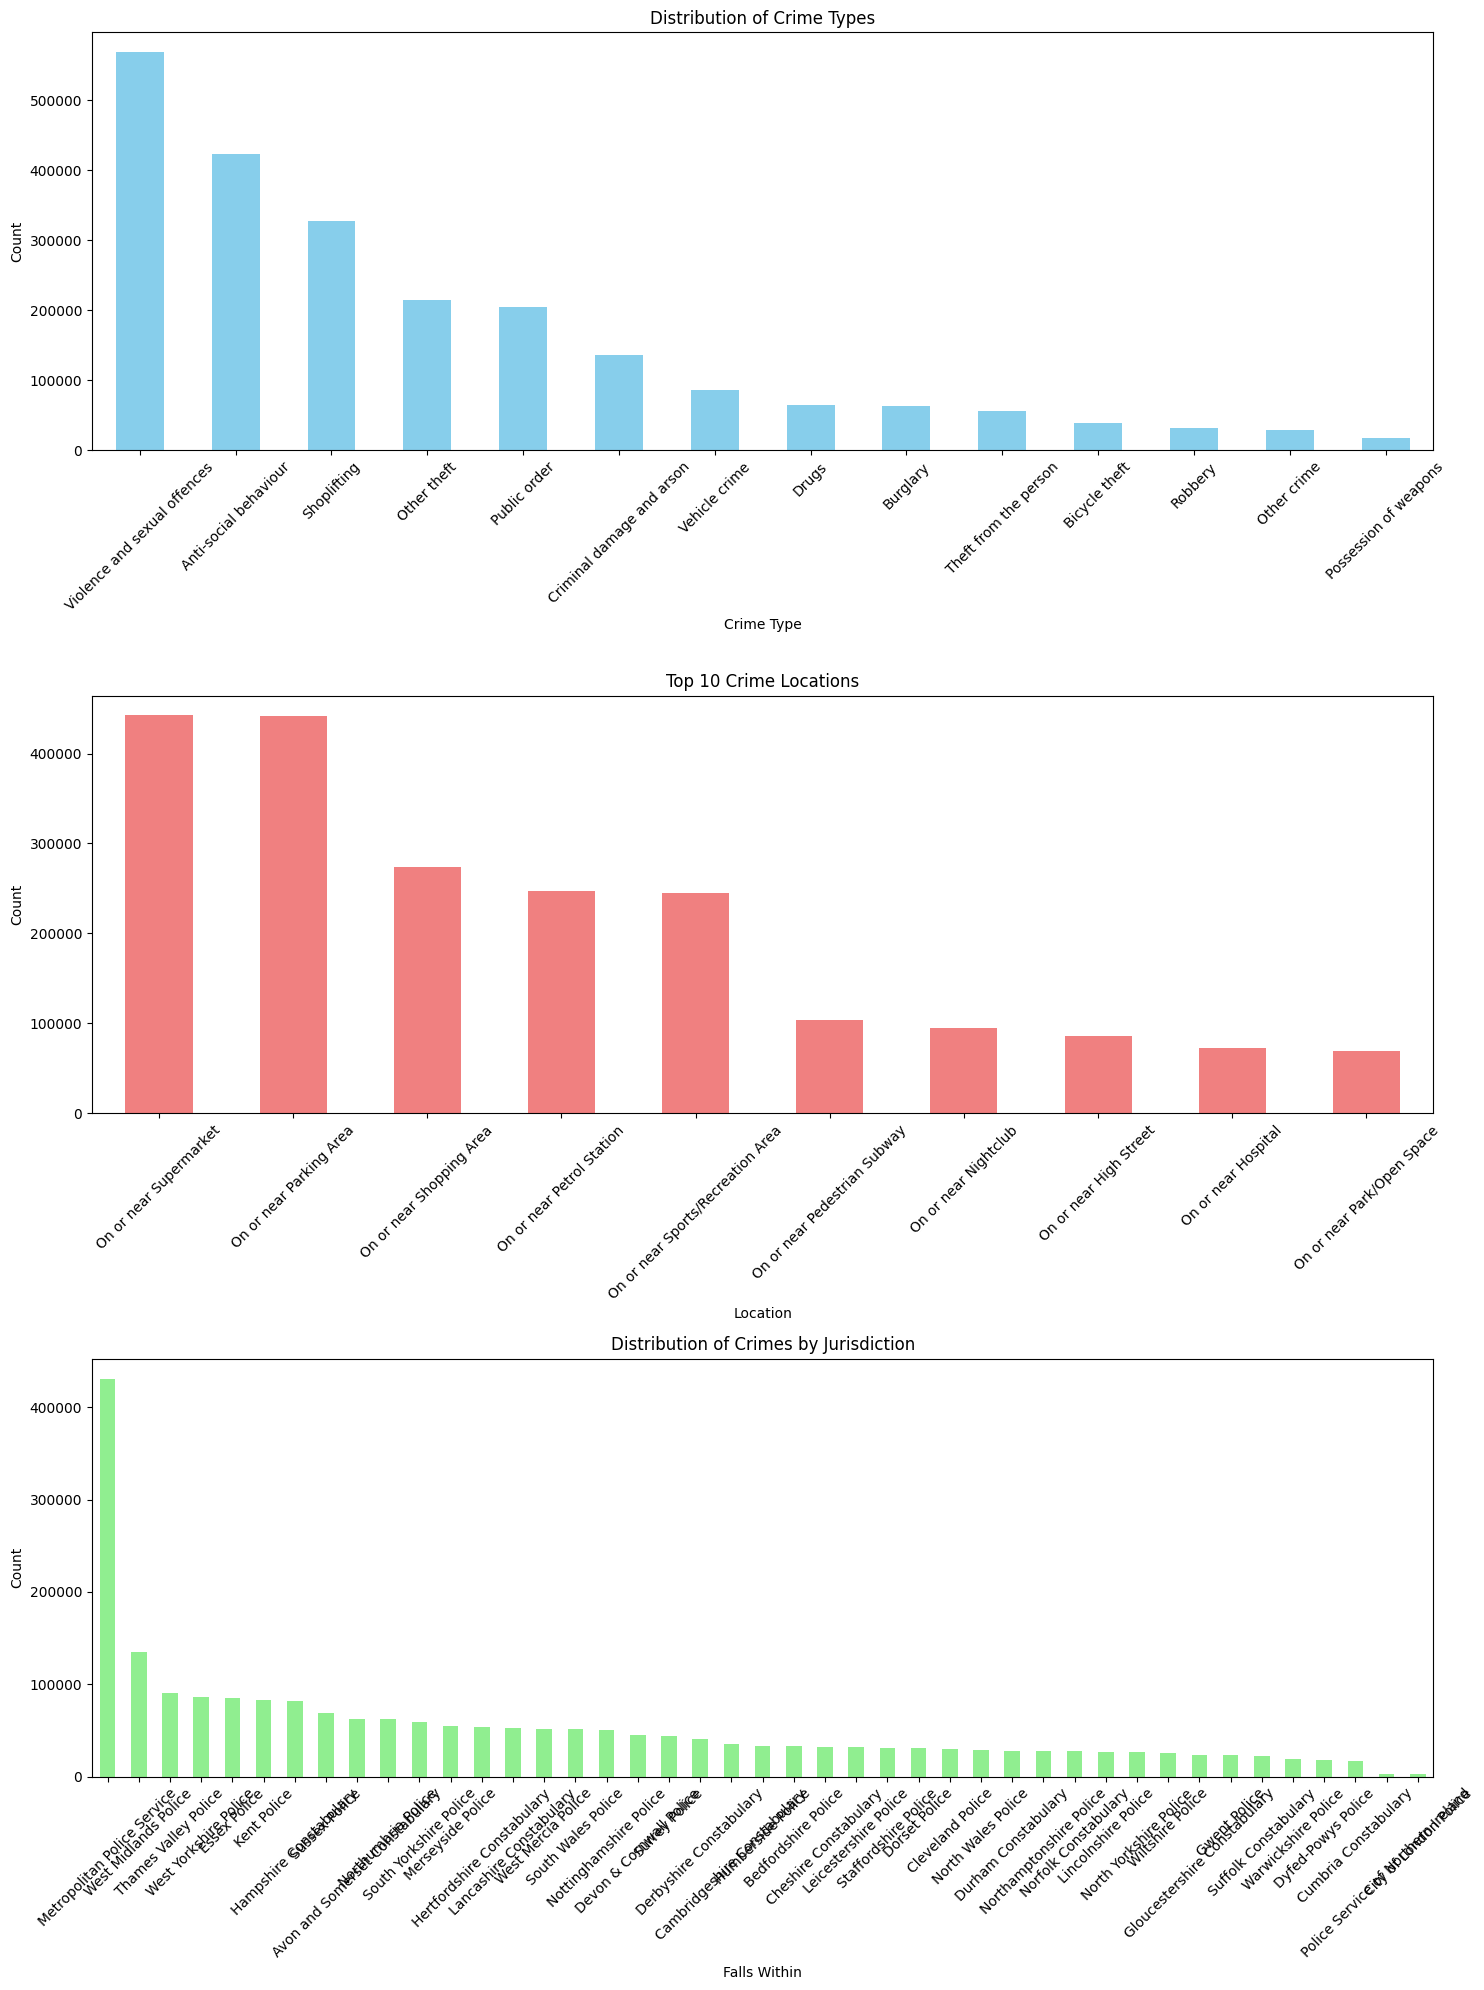

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Crime Types
filtered_df['Crime type'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Crime Types')
axs[0].set_xlabel('Crime Type')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Locations
filtered_df['Location'].value_counts().head(10).plot(kind='bar', ax=axs[1], color='lightcoral')  # Displaying top 10 for clarity
axs[1].set_title('Top 10 Crime Locations')
axs[1].set_xlabel('Location')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Falls Within
filtered_df['Falls within'].value_counts().plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title('Distribution of Crimes by Jurisdiction')
axs[2].set_xlabel('Falls Within')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


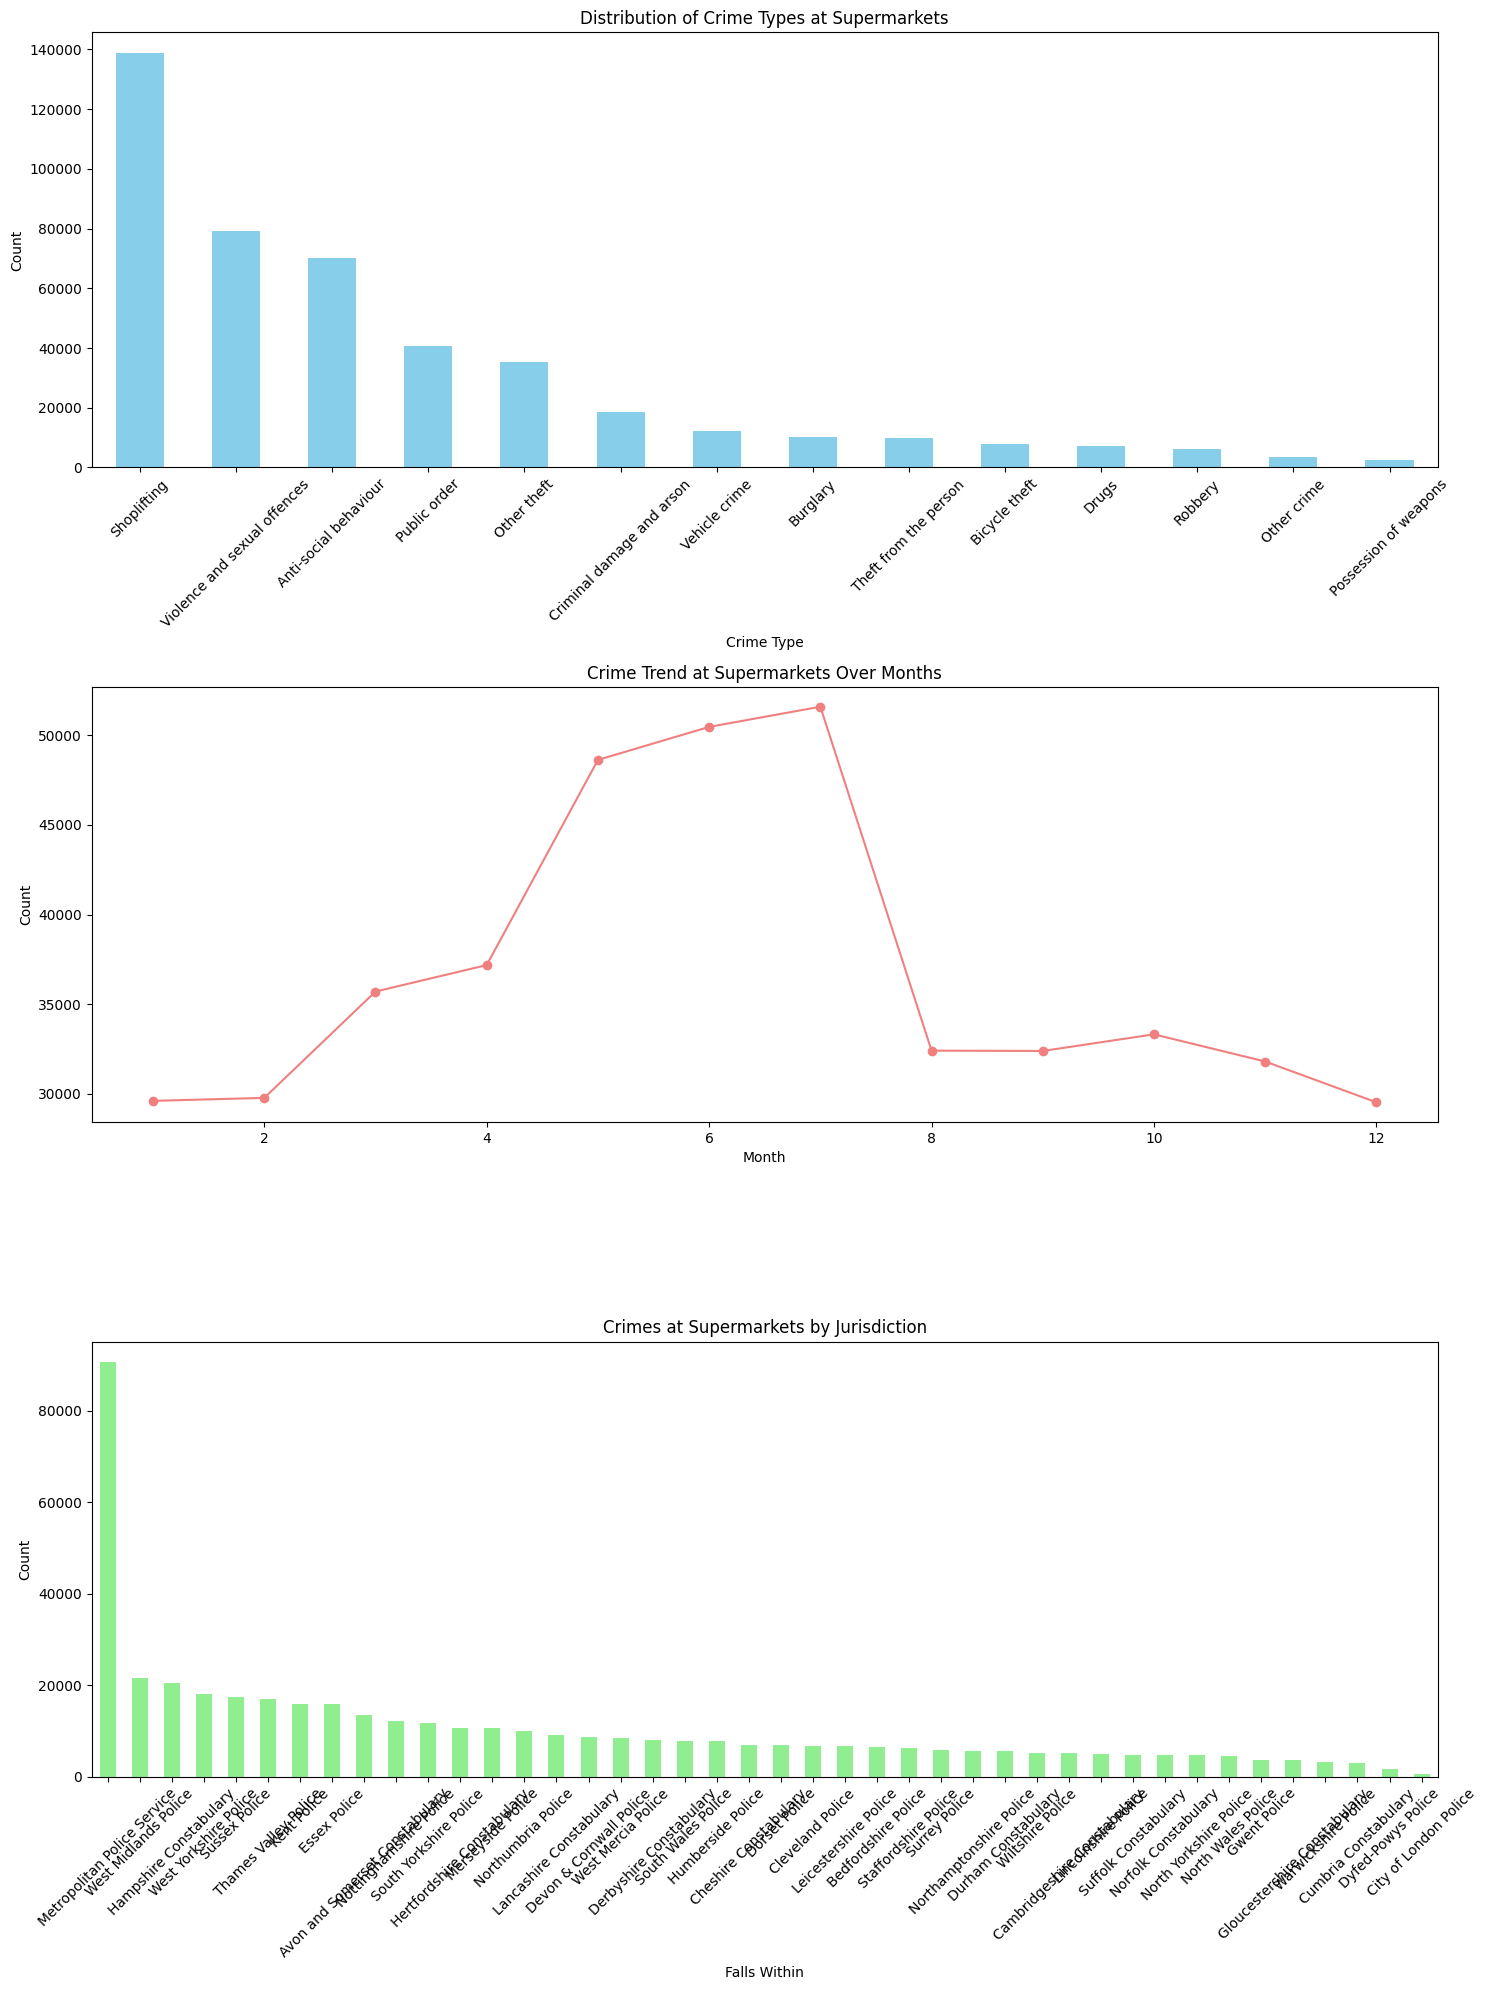

In [21]:
# Filter the dataframe for crimes "On or near Supermarket"
supermarket_df = filtered_df[filtered_df['Location'] == "On or near Supermarket"]

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Crime Types at Supermarkets
supermarket_df['Crime type'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Crime Types at Supermarkets')
axs[0].set_xlabel('Crime Type')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Trend Over Time
supermarket_df['Month_only'].value_counts().sort_index().plot(kind='line', marker='o', ax=axs[1], color='lightcoral')
axs[1].set_title('Crime Trend at Supermarkets Over Months')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')

# Jurisdiction Analysis
supermarket_df['Falls within'].value_counts().plot(kind='bar', ax=axs[2], color='lightgreen')
axs[2].set_title('Crimes at Supermarkets by Jurisdiction')
axs[2].set_xlabel('Falls Within')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [22]:
filtered_df.describe()

,Month,Longitude,Latitude,Context,Year,Month_only
count,2262524,2.262524e+06,2.262524e+06,2262524.0,2.262524e+06,2.262524e+06
mean,2021-09-28 22:42:08.835937024,-1.161705e+00,5.224959e+01,0.0,2.021288e+03,6.477881e+00
min,2020-07-01 00:00:00,-7.830407e+00,4.991306e+01,0.0,2.020000e+03,1.000000e+00
25%,2021-02-01 00:00:00,-1.930189e+00,5.147754e+01,0.0,2.021000e+03,4.000000e+00
50%,2021-09-01 00:00:00,-1.135327e+00,5.180945e+01,0.0,2.021000e+03,6.000000e+00
75%,2022-04-01 00:00:00,-1.496190e-01,5.302855e+01,0.0,2.022000e+03,9.000000e+00
max,2023-07-01 00:00:00,1.757943e+00,5.578720e+01,0.0,2.023000e+03,1.200000e+01
std,NaN,1.265709e+00,1.102612e+00,0.0,9.390891e-01,3.198349e+00
